You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)


Here’s the dataset link:

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?

usp=sharing

By following these steps, you can develop a comprehensive understanding of decision tree modeling and
its applications to real-world healthcare problems. Good luck!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
"""Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables."""

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
feature_list = list(df.columns)

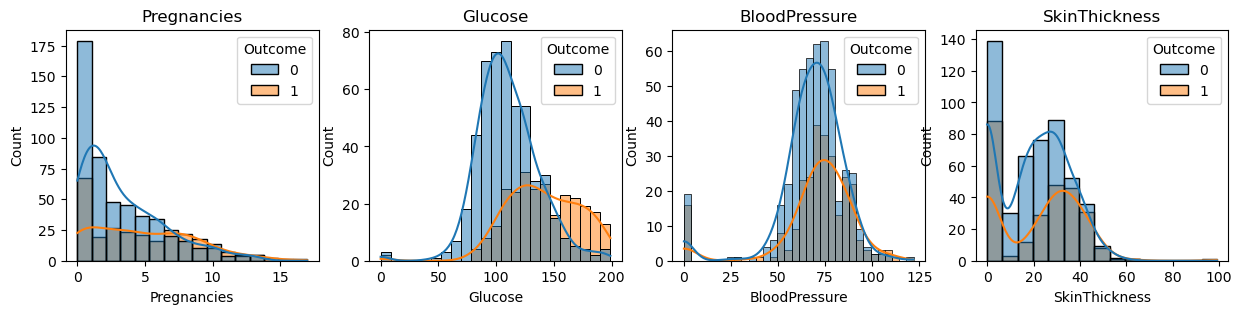

In [7]:
plt.figure(figsize=(15,3))
for i in range(4):
    plt.subplot(1,4,i+1)
    sns.histplot(x=feature_list[i],data=df,hue='Outcome',kde=True)
    plt.title(f"{feature_list[i]}")

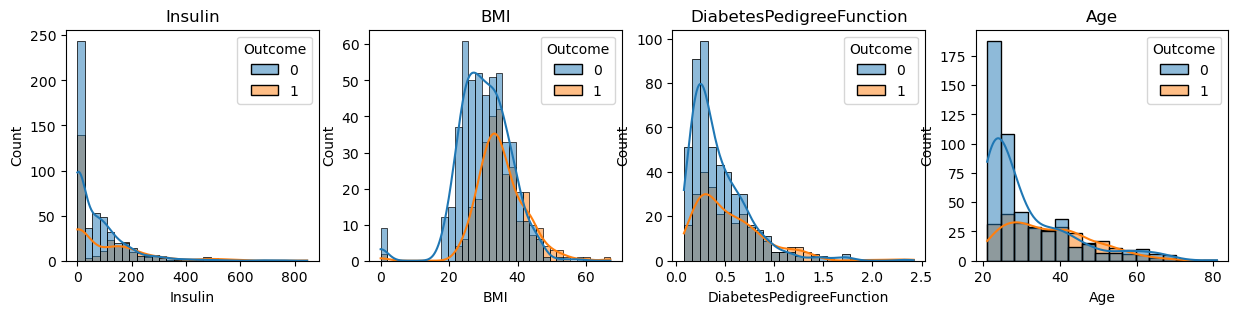

In [8]:
plt.figure(figsize=(15,3))
for i in range(4,8):
    plt.subplot(1,4,i-3)
    sns.histplot(x=feature_list[i],data=df,hue='Outcome',kde=True)
    plt.title(f"{feature_list[i]}")

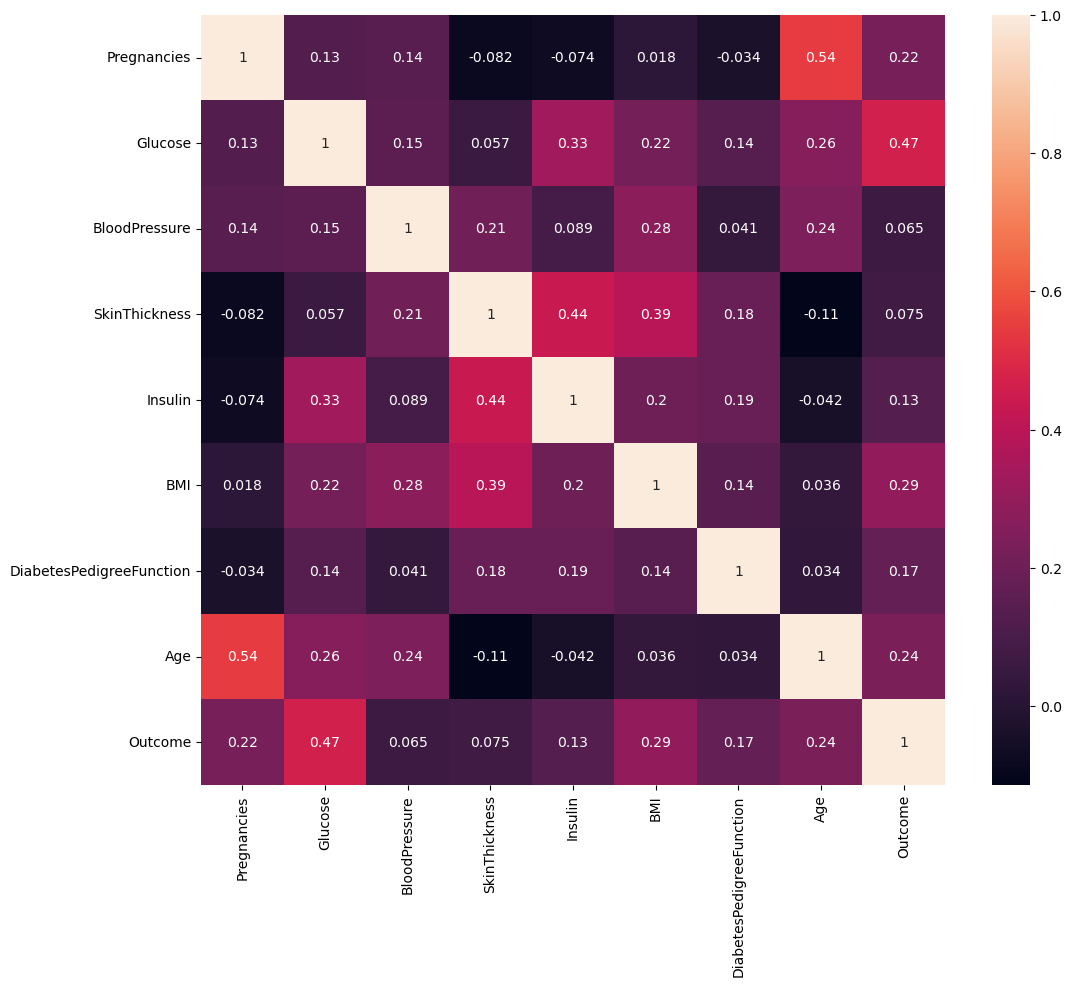

In [26]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [17]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

print(correlation(df, 0.80))
# There is no correlated features

set()


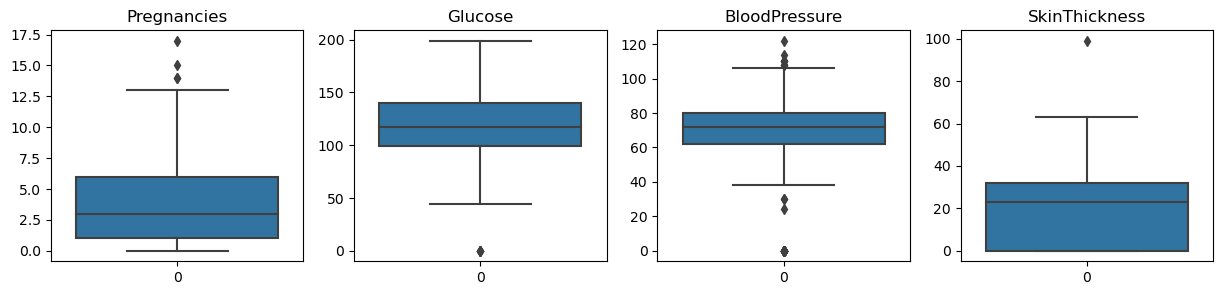

In [22]:
plt.figure(figsize=(15,3))
for i in range(4):
    plt.subplot(1,4,i+1)
    sns.boxplot(df[feature_list[i]])
    plt.title(f"{feature_list[i]}")
plt.show()

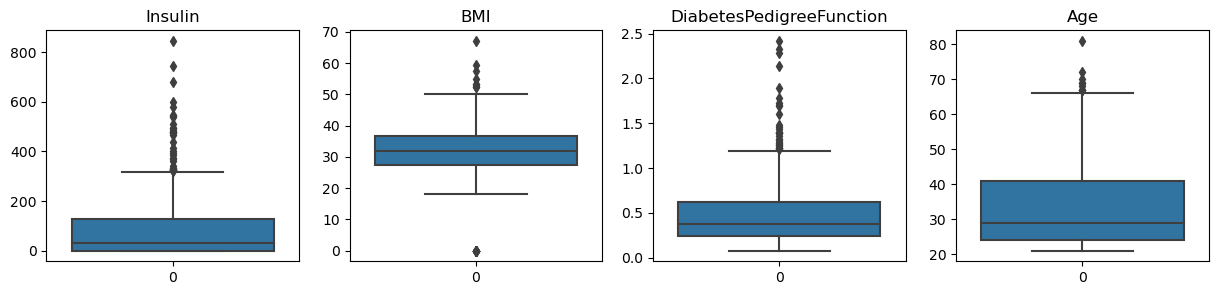

In [24]:
plt.figure(figsize=(15,3))
for i in range(4,8):
    plt.subplot(1,4,i-3)
    sns.boxplot(df[feature_list[i]])
    plt.title(f"{feature_list[i]}")
plt.show()

In [43]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
"""Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary. """
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [84]:
# Handling Outliers
def outliers(df_copy,z):
    min, Q1, Q2, Q3, max = np.quantile(df_copy[z], [0, 0.25, 0.50, 0.75, 1])
    IQR = Q3 - Q1
    lower_fence = Q1 - (1.5 * IQR)
    higher_fence = Q3 + (1.5 * IQR)
    outliers = []
    for i in list(df_copy[z]):
        if i >= lower_fence and i <= higher_fence:
            pass
        else:
            df_copy[z][df_copy[z] == i] = df_copy[z].mean()

feature_list = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for i in feature_list:
    outliers(df,i)

/tmp/ipykernel_77/4128099864.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[z][df_copy[z] == i] = df_copy[z].mean()


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [86]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [87]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 9.0 MB/s eta 0:00:00


In [88]:
# Handling Inbalane Data

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']], df['Outcome'])

In [89]:
X['Outcome'] = y
X['Outcome'].value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [90]:
df = X

In [ ]:
"""Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility. """

In [91]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [93]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 8), (300, 8), (700,), (300,))

In [94]:
"""Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. 
       Use cross-validation to optimize the hyperparameters and avoid overfitting."""

from sklearn.tree import DecisionTreeClassifier

# Define the decision tree classifier with ID3 algorithm
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [104]:
import warnings
warnings.filterwarnings('ignore')

parameter = {
    'criterion' : ['gini','entropy','log_loss'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
    'max_features' : ['auto','sqrt','log2']
}

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(DecisionTreeClassifier(), param_grid=parameter, cv=5, scoring='accuracy')

# Train the data
clf.fit(X_train,y_train)

print(clf.best_params_)
y_pred = clf.predict(X_test)



{'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'splitter': 'random'}


In [108]:
c = DecisionTreeClassifier(criterion='entropy',max_depth=12,max_features='sqrt',splitter='random')
c.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features='sqrt',
                       splitter='random')

In [109]:
"""Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. 
       Use confusion matrices and ROC curves to visualize the results. """

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[ 94  38]
 [ 50 118]]
0.7066666666666667
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       132
           1       0.76      0.70      0.73       168

    accuracy                           0.71       300
   macro avg       0.70      0.71      0.70       300
weighted avg       0.71      0.71      0.71       300



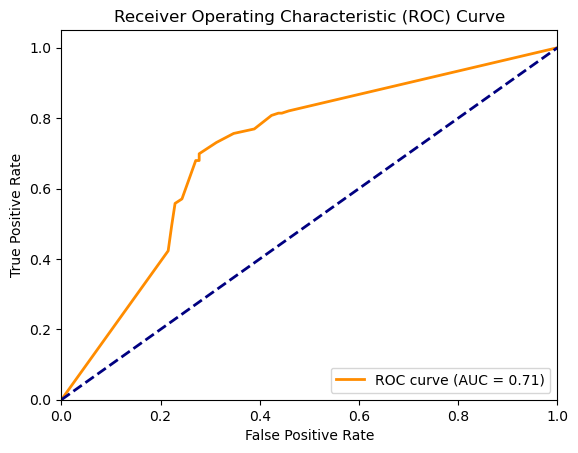

In [110]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)

# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

[Text(0.3451813587512794, 0.9615384615384616, 'x[5] <= 26.476\nentropy = 1.0\nsamples = 700\nvalue = [356, 344]'),
 Text(0.04861821903787104, 0.8846153846153846, 'x[0] <= 3.902\nentropy = 0.565\nsamples = 113\nvalue = [98, 15]'),
 Text(0.028659160696008188, 0.8076923076923077, 'x[1] <= 76.885\nentropy = 0.371\nsamples = 70\nvalue = [65, 5]'),
 Text(0.02456499488229273, 0.7307692307692307, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.032753326509723645, 0.7307692307692307, 'x[5] <= 25.965\nentropy = 0.387\nsamples = 66\nvalue = [61, 5]'),
 Text(0.028659160696008188, 0.6538461538461539, 'x[4] <= 211.189\nentropy = 0.4\nsamples = 63\nvalue = [58, 5]'),
 Text(0.02456499488229273, 0.5769230769230769, 'x[0] <= 0.483\nentropy = 0.409\nsamples = 61\nvalue = [56, 5]'),
 Text(0.02047082906857728, 0.5, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.028659160696008188, 0.5, 'x[2] <= 87.783\nentropy = 0.451\nsamples = 53\nvalue = [48, 5]'),
 Text(0.02456499488229273, 0.42307692307

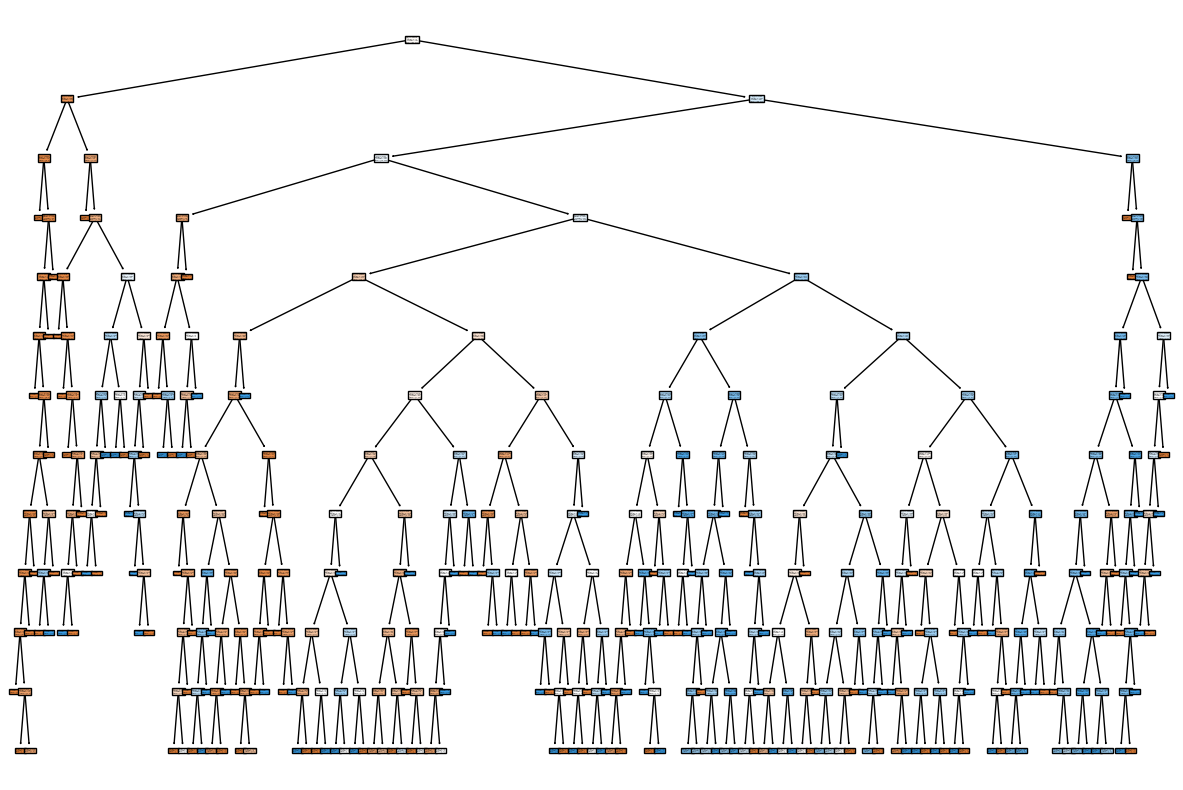

In [111]:
"""Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. 
       Use domain knowledge and common sense to explain the patterns and trends."""
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(c, filled=True)

# Since its a huge dataset their is no way to determine the splits, branches and leavees, 